# Deep Learning with TensorFlow
### Week 1: Introduction to Deep Learning

## Contents
[1. Introduction](#introduction)

[2. Machine learning recap](#ml_recap)

[3. Mathematical neuron](#neuron)

[4. TensorFlow Tensors and Variables (\*)](#tensors_and_variables)

[5. Stochastic gradient descent](#sgd)

[6. Multilayer perceptrons](#mlp)

[7. The Sequential class (\*)](#sequential)

[References](#references)

<a class="anchor" id="introduction"></a>
## Introduction

Welcome to the Deep Learning with TensorFlow module! Deep learning is one of the most exciting and fastest developing areas of artificial intelligence, and continues to break new ground and set the state of the art in many application domains. In this module you will learn the foundations of deep learning and how to develop neural network architectures for different problem tasks and data domains, including design, initialisation, optimisation, prediction and evaluation. 

There will be a particular focus on practical implementation in this module, and for this you will learn the popular open source machine learning library [TensorFlow](https://www.tensorflow.org/). Tensorflow was released by Google in 2015, and is widely used today amongst researchers and professionals at all levels. 

In the second half of the module, the focus will move towards probabilistic deep learning models, and will make use of [TensorFlow Probability](https://www.tensorflow.org/probability), which is a library that is built on top of TensorFlow that makes it easy to develop probabilistic models. 

These lecture notes are presented in jupyter notebooks to enable integration of TensorFlow code. You will see there are places where code cells are present, to demonstrate the concepts in code. In several places the code cells will be empty, and these will be for you to complete alongside the coding tutorial videos during the module. To begin, you should import TensorFlow in the cell below and check the version:

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


This module has been put together using the latest stable release of TensorFlow at the time. A list of packages and versions used in these notebooks are available in the `requirements.txt` file provided, which you can also use to install dependencies inside a virtual environment.

It is likely that the APIs for TensorFlow (and other packages) may change with new version releases, and in the future some of the code presented in these notebooks and the coding tutorials may become deprecated. Make sure to keep an eye on breaking changes in newer library versions.

In this week we will review some important machine learning concepts, including a general definition of machine learning, types of problem tasks, data, and performance measures, generalisation, validation, dataset splits, overfitting/underfitting and methods of regularisation. We will then introduce the concept of the artifical neuron, and define the simplest of deep learning architectures; the multilayer perceptron (MLP) or feedforward network. We will review the stochastic gradient descent algorithm that is commonly used to train neural network models.

We will also get started with TensorFlow by learning about two important low-level objects, which are Tensors and Variables. We will also use the high-level Keras Sequential API to build, train and make predictions from our first multilayer perceptrons, and see how Tensors and Variables are used within this model class.

<a class="anchor" id="ml_recap"></a>
## Machine learning recap

Deep learning is a subfield of machine learning, and so many of the core concepts of machine learning will be required in this module. For general machine learning references, see e.g. [Bishop](#Bishop06), [Hastie et al](#Hastie01) and [Murphy](#Murphy12). In order to motivate some of the most important concepts, let's first review the definition of machine learning itself. There are several definitions and perspectives on this, but one of the most popular is due to [Mitchell](#Mitchell97):

> A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P if its performance at tasks in T, as measured by P, improves with experience E.

We can unpick this definition by looking at what is meant by _experience E, tasks T_ and _performance measure P_. 

*Tasks T.* One of the strengths of deep learning models are their flexibility to solve a wide range of problem tasks. Typical tasks could include:

* Classification
* Regression
* Clustering
* Anomaly detection
* Density estimation

*Experience E.* This relates to the type of data that is used to accomplish the given task. The data could be labelled examples (such as images of digits and their corresponding labels), unlabelled examples, or streaming data coming from an environment that an agent interacts with (this is the setting for reinforcement learning). Of course, the type of data needs to be appropriate for the learning task. A typical assumption is that the data is independent and identically distributed (iid).

*Performance measure P.* Given a learning task T and experience E, we then need a way of measuring how well a machine learning system accomplishes the task T. For example, for a regression task this could be the mean squared error, or for a binary classification task we could use binary cross entropy, or area under the ROC curve. 

For example, suppose we have a labelled dataset $\mathcal{D}:=(x_i, y_i)_{i=1}^N$ of inputs $x_i\in\mathbb{R}^D$ and outputs (or targets) $y_i\in\mathbb{R}$. The task could be a regression task, where we aim to predict a target $y$ given an input $x$, and where we measure performance using the mean squared error loss. Our aim is to minimise the expected loss under the data distribution:

$$
\begin{equation}
\mathcal{L}(\theta) := \mathbb{E}_{x, y\sim p_{data}} \left[(f_\theta(x) - y)^2\right], \tag{1}
\end{equation}
$$

where $f_\theta:\mathbb{R}^D\mapsto\mathbb{R}$ is our parameterised regression function, with parameters ${\theta}\in\mathbb{R}^p$. However, we do not have access to the true data distribution $p_{data}$, but instead only have access to the set of samples $(x_i, y_i)_{i=1}^N$.

In the following cell we create and plot a toy dataset for illustration.

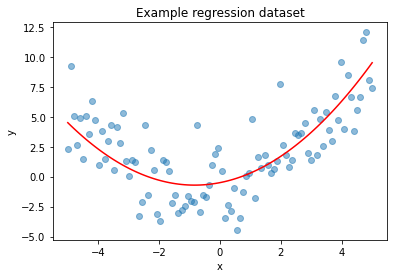

In [ ]:
# Create an example toy dataset
# y = 0.3 * x**2 + 0.5 * x - 0.5 + eps,   eps ~ N(0, 4)

import numpy as np
import matplotlib.pyplot as plt

n_samples = 100
x = np.linspace(-5, 5, n_samples)[..., np.newaxis]
y_true = 0.3 * x**2 + 0.5 * x - 0.5 
noise = 2 * np.random.randn(n_samples, 1)
y = y_true + noise

plt.plot(x, y_true, 'r-')
plt.scatter(x, y, alpha=0.5)
plt.title("Example regression dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### Data splits
In order to obtain a fair measure of the performance of an ML model, we typically split our available data into training and test partitions. The training data is used to infer the optimal parameters of our model, whilst the test data is used purely for evaluation. In addition, a third partition for validation data is also often used to tune the hyperparameters of the model. You should never use the validation or test splits for directly training the model (optimising its parameters).

In the following cell we use `sklearn` to make a training and test partition of our toy dataset.

In [ ]:
# We can use the train_test_split from sklearn to conveniently split the data

from sklearn.model_selection import train_test_split

print("x shape:", x.shape)
print("y shape:", x.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)
print("\nx_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("\nx_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x shape: (100, 1)
y shape: (100, 1)

x_train shape: (60, 1)
y_train shape: (60, 1)

x_test shape: (40, 1)
y_test shape: (40, 1)


This means that in practice what we optimise during training is the loss

$$
\begin{equation}
L(\theta) = \frac{1}{| \mathcal{D}_{train} |}\sum_{x_i, y_i\in \mathcal{D}_{train}}(f_\theta(x_i) - y_i)^2, \tag{2}
\end{equation}
$$

where $\mathcal{D}_{train}$ denotes the training data partition.

The following cells illustrate this for our toy dataset, by creating an example regression function and computing the training loss using the inbuilt function from TensorFlow.

In [ ]:
# Define an example regression function

def example_f(x_):
    return 0.5 * x_**2 + 0.9 * x_ - 0.25

In [ ]:
# Evaluate the MSE on the training set using TensorFlow MSE function

def mse(y_pred, y_true):
    return tf.reduce_mean(tf.keras.losses.mse(y_pred, y_true))

train_loss = mse(example_f(x_train), y_train)
print("Training loss: {:.4f}".format(train_loss))

Training loss: 12.3101


In [ ]:
# Check the tf.keras function is doing what we expect

np.allclose(mse(example_f(x_train), y_train), np.mean((example_f(x_train) - y_train)**2))

True

Usually, the bulk of the available data would be used for training. A typical split might be something like 60/20/20 for training/validation/test. In any case, it is important that the validation and test sets are large enough to be a representative sample of the data. They are both used as proxies for new data that could be presented to the model in deployment, and so give a measure of how well the model generalises to unseen data. 

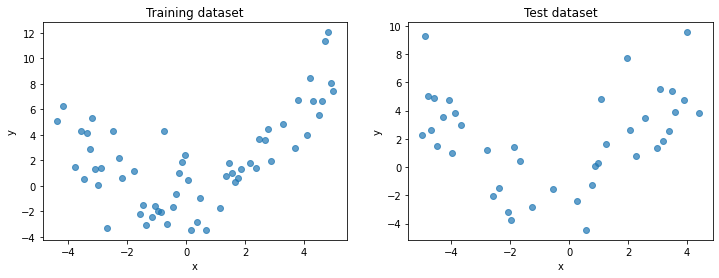

In [ ]:
# View the training and test data

fig = plt.figure(figsize=(12, 4))
fig.add_subplot(1, 2, 1)
plt.scatter(x_train, y_train, alpha=0.7)
plt.title("Training dataset")
plt.xlabel("x")
plt.ylabel("y")

fig.add_subplot(1, 2, 2)
plt.scatter(x_test, y_test, alpha=0.7)
plt.title("Test dataset")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

#### Overfitting and underfitting

A common issue in all machine learning models is underfitting vs overfitting. Overfitting is when a model becomes too specific to the training data, and doesn't generalise well beyond it. It is characterised by having a good performance measure on the training data and much worse performance on the test data. Underfitting is just the reverse; it is where a model does not manage to fit the training (or test) data well. It is characterised by a similar poor performance on both training and test sets.

The following cells show examples of this using our toy dataset and regression functions from `sklearn`.

In [ ]:
# Fit a kernel regressor to the training data

from sklearn.kernel_ridge import KernelRidge

kernel_regressor = KernelRidge(alpha=1e-5, kernel='rbf', gamma=1.)
kernel_regressor.fit(x_train, y_train)

kernel_train_loss = mse(kernel_regressor.predict(x_train), y_train)
kernel_test_loss = mse(kernel_regressor.predict(x_test), y_test)

In [ ]:
# Fit a high-degree polynomial and a linear model to the training data

from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

linear_train_loss = mse(linear_regressor.predict(x_train), y_train)
linear_test_loss = mse(linear_regressor.predict(x_test), y_test)

In [ ]:
# View the training and test data

fig = plt.figure(figsize=(14, 5))
fig.add_subplot(1, 2, 1)
plt.plot(x, y_true, label="Target function")
plt.scatter(x_train, y_train, alpha=0.7, label='Train data')
plt.scatter(x_test, y_test, alpha=0.7, label='Test data')

plt.plot(x, kernel_regressor.predict(x), 'r-', label="Kernel regressor")
plt.title("Overfitting - kernel regressor")
fig.text(0.3, 0., "Training loss: {:.4f}\nTest loss: {:.4f}".format(kernel_train_loss, kernel_test_loss),
        ha='center')
plt.legend()

fig.add_subplot(1, 2, 2)
plt.plot(x, y_true, label="Target function")
plt.scatter(x_train, y_train, alpha=0.7, label='Train data')
plt.scatter(x_test, y_test, alpha=0.7, label='Test data')

plt.plot(x, linear_regressor.predict(x), 'r-', label="Linear regressor")
plt.title("Underfitting - linear regressor")
fig.text(0.72, 0., "Training loss: {:.4f}\nTest loss: {:.4f}".format(linear_train_loss, linear_test_loss),
        ha='center')
plt.legend()
plt.show()

The issue of underfitting vs overfitting is related to **model capacity**, or **model complexity**. These terms refer to the expressive power of a model, or how rich the set of patterns or relationships is that the model class is able to represent. A high capacity model is very expressive, and can represent highly sophisticated relationships in the data. The danger is that if the model capacity is too high, then it can fit spurious relationships or idiosyncrasies that are present in the training data, which aren't representative of the general properties of the data distribution, and this can lead to overfitting. Likewise, if the model capacity is too low, then the model will be unable to represent the patterns or relationships in the data, leading to underfitting.

In our running example, the kernel regressor above has high capacity, whilst the linear regressor has low capacity. 

A general schematic plot that we would expect to see is the training loss decreasing as capacity/complexity increases, whilst the test loss will decrease at first but then increase when the model becomes overly complex in relation to the data.

<img src="figures/error_vs_complexity.png" alt="Loss vs complexity" style="width: 450px;"/>
<center>Schematic diagram for error vs complexity; underfitting vs overfitting.</center>

We can see an example of this trend on our running example, if we fit a series of polynomial regressors to the training data with increasing degree. We know that the true underlying function is quadratic, so we would expect to see the test error increasing as the degree increases from 2.

In [ ]:
# Fit polynomial regressors for different degrees

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

num_degrees = 20
degrees = np.arange(num_degrees)

polynomial_regressors = []
for degree in degrees:
    poly_regressor = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    poly_regressor.fit(x_train, y_train)
    polynomial_regressors.append(poly_regressor)

In [ ]:
# Plot the training and test losses for the polynomial regressors

train_losses = [mse(pr.predict(x_train), y_train) for pr in polynomial_regressors]
test_losses = [mse(pr.predict(x_test), y_test) for pr in polynomial_regressors]

plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Training losses')
plt.plot(test_losses, label='Test losses')
plt.title("Training and test losses for polynomial\nregressors of varying degree")
plt.xticks(np.arange(num_degrees))
plt.xlabel("Degree")
plt.ylabel("MSE")
plt.legend()
plt.show()

Note that if we used the above information to select the best hyperparameter (polynomial degree), then we would in fact be using the data split as a training/validation split, and so should use a separate test set for a final evaluation of the model.

#### Loss functions

The parameters of deep learning models are often optimised using maximum likelihood estimation. That is, we search for parameters $\hat\theta$ such that

$$
\hat\theta = \underset{\theta}{\arg \max} ~\mathbb{P}_{model}(\mathcal{D}_{train}; \theta).
$$

Many common loss functions can be derived through the principle of maximum likelihood and certain modelling assumptions. For example, the mean squared error loss function above (2) can be derived as the negative log-likelihood of the training data under the assumption of homoscedastic Gaussian observation noise (up to a constant scaling factor). 

Similarly, cross entropy loss functions arise in classification problems when applying the principle of maximum likelihood. In a supervised classification problem where there are $C$ classes, and we have a parameterised model $f_{\theta}:\mathbb{R}^D\mapsto\mathbb{R}^C$, then the categorical cross entropy loss function is given by

$$
L(\theta) = -\frac{1}{|\mathcal{D}_{train}|} \sum_{x_i, \tilde{y}_{i}\in\mathcal{D}_{train}}\sum_{j=1}^{C} \tilde{y}_{ij} \ln f_\theta(x_i)_j,
$$

where $\tilde{y}_{ij}$ is the binary label for example $i$, that is equal to 1 if the correct class is $C_j$, and 0 otherwise.

In the particular case of binary classification we obtain

$$
L(\theta) = -\frac{1}{|\mathcal{D}_{train}|} \sum_{x_i, y_i\in\mathcal{D}_{train}} {y}_{i} \ln f_\theta(x_i)_j + (1-{y}_{i}) \ln (1 - f_\theta(x_i)_j),
$$

where in the above, the labels $y_i \in\{0, 1\}$.

#### Regularisation

A common way to tackle problems of overfitting is through regularisation methods. Broadly speaking, methods of regularisation seek to constrain the model capacity. There are many methods of regularisation depending on the model, data and task. Some examples of regularisation techniques that are used for deep learning models are:

* Weight decay
* Patience/early stopping
* Control model complexity
* Dropout
* Weight sharing
* Dataset augmentation

We will be using several of these regularisation techniques in implementations during the module. The last of these - dataset augmentation - is worth singling out as the best form of regularisation if it is possible.

For example, for a linear model of the form

$$
f(\mathbf{x}) = \sum_j w_j \phi_j(\mathbf{x})
$$

a typical regularisation is to add a sum of squares penalty term to discourage the weights $w_j$ from getting too large. Specifically, instead of minimising the mean squared error (2), we minimise the loss function

$$
\begin{equation}
L(\mathbf{w}, \alpha) = \frac{1}{| \mathcal{D}_{train} |}\left(\sum_{x_i, y_i\in \mathcal{D}_{train}}(f(x_i) - y_i)^2 
+ \alpha\sum_j w_j^2\right), \tag{3}
\end{equation}
$$

where the coefficient $\alpha$ is a hyperparameter.

<a class="anchor" id="neuron"></a>
## Mathematical neuron
Early research into neural networks focused on models of learning in the brain, and used mathematical (or artificial) neurons as fundamental building blocks. These are simple models of neurons in the brain, that receive a set of inputs, which are weighted and summed before being passed through an activation function (or transfer function):

$$
\begin{equation}
y_k = \sigma\left(\sum_j w_{kj}x_j + b_k\right) \tag{4}
\end{equation}
$$

<img src="figures/mathematical_neuron.png" alt="Artificial neuron" style="width: 500px;"/>
<center>Sketch of a mathematical neuron.</center>

<img src="figures/biological_neuron.png" alt="Biological neuron" style="width: 500px;"/>
<center>Sketch of a biological neuron. Source: <a href="https://en.wikipedia.org/wiki/Neuron">Wikipedia</a>.</center>

In the above, the inputs to the neuron are denoted by $x_j$, the weights $w_{kj}$, bias $b_k$ and activation function $\sigma$. The weights and bias are parameters that need to be tuned for the given task. The first artificial neuron was developed by [McCulloch and Pitts](#McCullochPitts43), which used a simple threshold activation function (step function) only on binary inputs, and produce a binary output. Later, [Rosenblatt](#Rosenblatt58) developed the **perceptron**, which also used a step function threshold for binary classification (but with more general weights and inputs), and importantly also introduced a learning algorithm for the weights. The perceptron learning algorithm is guaranteed to converge for linearly separable data. However, the limitations of linear models was largely responsible for the decline in interest in neural networks until its revival in the 1980s.

<a class="anchor" id="tensors_and_variables"></a>
## TensorFlow Tensors and Variables

In this section we will introduce some fundamental building blocks and operations in TensorFlow. [Tensors](https://www.tensorflow.org/api_docs/python/tf/Tensor) and [Variables](https://www.tensorflow.org/api_docs/python/tf/Variable) are low-level objects that we will be using all the time in TensorFlow.

#### Tensors
You can think of Tensors as being multidimensional versions of vectors and arrays. Of course, these are the objects that Tensorflow gets its name from. When we build our neural network models, what we’re doing is defining a computational graph, where input data is processed through the layers of the network and sent through the graph all the way to the outputs. Tensors are the objects that get passed around within the graph, and capture those computations within the graph. 

Let’s take a look at some examples to get a better feel for how this works.

In [ ]:
import tensorflow as tf

In [ ]:
# Create a constant Tensor



We can see that Tensors have `shape` and `dtype` properties, similar to NumPy arrays.

In [ ]:
# Examine shape property



In [ ]:
# Examine dtype property



Tensor objects can have different types, just like NumPy arrays. Take a look [here](https://www.tensorflow.org/api_docs/python/tf) for a complete list of available types.

In [ ]:
# Create Tensor objects of different type



In [ ]:
# Create a rank-2 Tensor 



In [ ]:
# Get Tensor rank



In [ ]:
# Create a Tensor with tf.ones



In [ ]:
# Create a Tensor with tf.zeros



We can convert a TensorFlow Tensor into a NumPy array using the `numpy` method.

In [ ]:
# Convert Tensor to NumPy array



We can compute Tensor multiplication using `tf.tensordot` (see the [docs](https://www.tensorflow.org/api_docs/python/tf/tensordot)). The `axes` argument can be an integer or list of integers. When it is a single integer `n`, the contraction is performed over the last `n` axes of the first Tensor and the first `n` axes of the second Tensor. If it is a list, then the elements of the list specify the axes to contract.

In [ ]:
# Compute matrix-vector product



In the case of two rank-2 Tensors, we can use the `tf.linalg.matmul` function. (In fact, we can use rank >= 2 Tensors with `tf.linalg.matmul` - see the [docs](https://www.tensorflow.org/api_docs/python/tf/linalg/matmul).) 

In [ ]:
# Use tf.linalg.matmul to compute product



Useful operations to manipulate Tensor shapes are `tf.expand_dims`, `tf.squeeze` and `tf.reshape`.

In [ ]:
# Add an extra dimension to a Tensor



In [ ]:
# Use tf.matmul, tf.squeeze and tf.reshape



It is also often useful to fill Tensors with random values.

In [ ]:
# Create a random normal Tensor



In [ ]:
# Create a random integer Tensor



#### McCulloch-Pitts neuron
As an example, we will use Tensors to implement the McCulloch-Pitts neuron for a simple logical function. The McCulloch-Pitts neuron operates on boolean inputs, and uses a threshold activation to produce a boolean output. The function can be written as

$$
f(\mathbf{x}) = 
\begin{cases}
1 \quad \text{if } \sum_i x_i \ge b\\
0 \quad \text{if } \sum_i x_i < b
\end{cases}
$$

In [ ]:
# Define the AND function



In [ ]:
# Test the AND function with a few examples



In [ ]:
# Define the OR function



In [ ]:
# Test the OR function with a few examples



*Exercise.* Define the function for the NOR operation below (all inputs must be zero) for inputs `x`. *Hint: use the* `tf.math.logical_not` *function.*

In [ ]:
# Define the NOR function

def logical_nor(x):
    pass

In [ ]:
# Test the NOR function with a few examples

print(logical_nor(tf.constant([1, 0])))  # False
print(logical_nor(tf.constant([0, 0])))  # True
print(logical_nor(tf.constant([0, 0, 0])))  # True
print(logical_nor(tf.constant([1, 0, 1])))  # False

#### Variables
Tensors are *immutable objects*; that is, their state cannot be modified. The operations they encapsulate (or the values of a constant Tensor) are fixed. Variables are special kinds of Tensors that have *mutable state*, so their values can be updated. This is useful for parameters of a model, such as the weights and biases in a neural network.

In [ ]:
# Create a TensorFlow Variable



This looks very similar to a Tensor. However, Variables come with extra methods for updating their state, such as `assign`, `assign_add` and `assign_sub`.

In [ ]:
# Assign a new value to the Variable



In [ ]:
# Add a value to the Variable



In [ ]:
# Subtract a value from the Variable



We will often use Variables in operations within the computational graph. The result of the operation is a Tensor.

In [ ]:
# Use a Variable in a simple operation



#### The perceptron
The perceptron is also a linear binary classifier, but with more flexible weights. It can be written as the following function

$$
f(\mathbf{x}) = 
\begin{cases}
1 \quad \text{if } \sum_i w_i x_i + b \ge 0\\
0 \quad \text{if } \sum_i w_i x_i + b < 0
\end{cases}
$$

As an example, we will use Tensors and Variables to implement the perceptron classifier.

In [ ]:
# Implement the weights and bias as Variables



In [ ]:
# Define the perceptron classifier



In [ ]:
# Create a random set of test points



In [ ]:
# Plot the points coloured by class prediction



In [ ]:
# Update the weights and bias and re-plot



*Exercise.* Can you find weights and bias values to implement the NOT gate for $x\in\{0, 1\}$ and the XOR gate for $x\in\{0, 1\}^2$? If yes, what are the values? If no, why not?

<a class="anchor" id="sgd"></a>
## Stochastic gradient descent

The second wave of interest in neural networks in the 80s was driven in large part by the connectionist movement (see e.g. [Rumelhart et al (1986a)](#Rumelhart86a)), which focused on the concept of intelligent behaviour arising out of many simple computations composed together, with knowledge being distributed across many units. Smooth activation functions were increasingly studied, as they allowed gradient-based methods such as stochastic gradient descent (SGD, [Robbins & Monro 1951](#Robbins51)) to be used in the optimisation of model parameters. 

#### Activation functions
A typical example of a smooth activation function is the logistic sigmoid:

In [ ]:
import tensorflow as tf

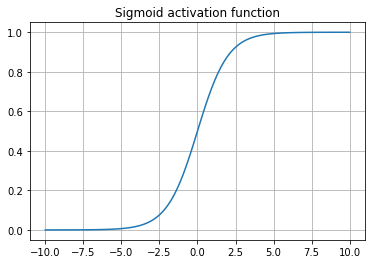

In [ ]:
# Plot the sigmoid function using the TensorFlow implementation

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
y = tf.keras.activations.sigmoid(x)
plt.grid()
plt.plot(x, y)
plt.title("Sigmoid activation function")
plt.show()

Note that linear regression and logistic regression can both be viewed as artificial neuron models, with linear (or no) activation function and sigmoid activation function respectively.

Other activation functions that are commonly used in deep learning models are the ReLU (rectified linear unit), tanh, ELU (exponential linear unit, [Clevert et al 2016](#Clevert16)), SELU (scaled exponential linear unit, [Klambauer et al 2017](#Klambauer17)), softplus, swish ([Ramachandran et al 2018](#Ramachandran18)).

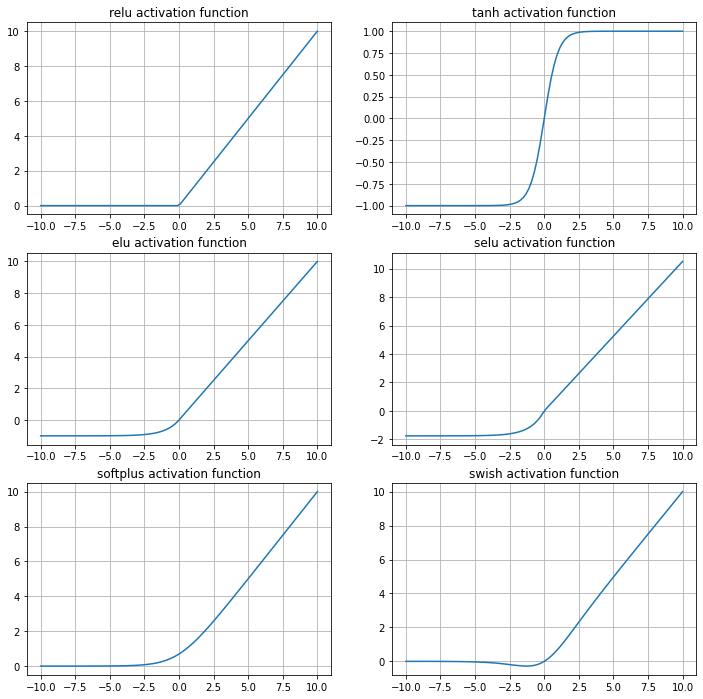

In [ ]:
# Plot example activation functions

x = np.linspace(-10, 10, 100)
fig = plt.figure(figsize=(12, 12))
for i, activation in enumerate(['relu', 'tanh', 'elu', 'selu', 'softplus', 'swish']):
    row = (i % 2) + 1
    col = (i // 2) + 1
    fig.add_subplot(3, 2, i + 1)
    plt.grid()
    plt.title("{} activation function".format(activation))
    plt.plot(x, getattr(tf.keras.activations, activation)(x))
plt.show()

You can see a complete list of available activation functions in `tf.keras.activations` [here](https://www.tensorflow.org/api_docs/python/tf/keras/activations).

#### Gradient descent

Suppose we have constructed our neural network model, which we represent as the function $f_\theta:\mathbb{R}^D\mapsto Y$, where $Y$ is the target space (e.g. $\mathbb{R}$ or $[0, 1]$). Suppose also that we have defined a suitable loss function 

$$
L(\theta; \mathcal{D}_{train}) := \frac{1}{|\mathcal{D}_{train}|} \sum_{x_i, y_i\in\mathcal{D}_{train}} l(y_i, f_\theta(x_i)),
$$

where $l(y_i, f_\theta(x_i))$ is the per-example loss. Then the gradient $\nabla_\theta L (\theta_0; \mathcal{D}_{train})$ evaluated at $\theta_0$ defines the direction of steepest ascent in parameter space at the point $\theta$. 

The gradient descent algorithm takes an initial guess for the parameters $\theta_0$ and updates the parameter values according to the rule

$$
\theta_{t+1} = \theta_{t} - \eta \nabla_\theta L(\theta_t; \mathcal{D}_{train}),\qquad t\in\mathbb{N}_0
$$

where $\eta_t>0$ is a small learning rate which may depend on $t$. For a suitably chosen $\eta_t$, the iterates $L(\theta_t; \mathcal{D}_{train})$, $t\in\mathbb{N}_0$ converge to a local minimum.

#### Stochastic gradient descent

Note that computing $\nabla_\theta L(\theta; \mathcal{D}_{train})$ as above requires computing the gradients of the per-example loss for every element in the training set. For large datasets (and large models) this can be prohibitively expensive. 

Stochastic gradient descent provides a cheaper estimate of the full gradient, by computing the gradient on a minibatch of data points, instead of the full dataset. In particular, we evaluate the gradient 

$$
L(\theta; \mathcal{D}_m) = \frac{1}{M} \sum_{x_i, y_i\in\mathcal{D}_m} l(y_i, f_\theta(x_i)),
$$

where $\mathcal{D}_m$ is a randomly sampled minibatch of training data points, $M = |\mathcal{D}_m|$ is the size of the minibatch (typically much smaller than $|\mathcal{D}_{train}|$). We then use the gradient $\nabla_\theta L(\theta_t; \mathcal{D}_m)$ to update the parameters

$$
\theta_{t+1} = \theta_{t} - \eta \nabla_\theta L(\theta_t; \mathcal{D}_m),\qquad t\in\mathbb{N}_0
$$

This update provides a stochastic approximation to the true gradient which is far more efficient to compute, and provides a huge speed up in the training process for large datasets.

<a class="anchor" id="mlp"></a>
## Multilayer perceptrons

The simplest type of deep learning model is the **multilayer perceptron**, also known as a **feedforward network**. This type of neural network can be viewed as an architecture consisting of layers of mathematical neurons, linked together in a directed acyclic graph.

#### MLP with single hidden layer
A key property of deep learning models is the fact that they are _compositional_ instead of _additive_. Where as linear regression models (or logistic regression, kernel regression) increase complexity by adding extra basis functions $\phi_i$ in the expansion

$$
f(\mathbf{x}) = \sum_{i} w_i \phi_i(\mathbf{x}),
$$

deep learning models increase complexity by composing multiple simple functions $\varphi_k$ together:

$$
f(\mathbf{x}) = \varphi_L(\varphi_{L-1}(\ldots\varphi_2(\varphi_1(\mathbf{x}))\ldots )).
$$

The functions $\varphi_k$ are defined to be affine transformations followed by an element-wise activation function. An example is the MLP with a single hidden layer: 

$$
\begin{align}
h_j^{(1)} &= \sigma\left( \sum_{i=1}^D w^{(0)}_{ji}x_i + b_j^{(0)} \right),\qquad j=1,\ldots,n_h, \tag{5}\\
\hat{y} &= \sigma_{out}\left( \sum_{i=1}^{n_h} w^{(1)}_{i}h^{(1)}_i + b^{(1)} \right). \tag{6}\\
\end{align}
$$

In the above, $\mathbf{x}\in\mathbb{R}^D$ is an example input, $n_h\in\mathbb{N}$ is the number of hidden units in the network, $\sigma, \sigma_{out}:\mathbb{R}\mapsto\mathbb{R}$ are activation functions, $w^{(0)}_{ji}\in\mathbb{R}$ and $w^{(1)}_{ji}\in\mathbb{R}$ are weights, and $b_j^{(0)}\in\mathbb{R}$ and $b^{(1)}\in\mathbb{R}$ are biases.

Following (5) and (6) we also define the **pre-activations** $a_j^{(1)} := \sum_{i=1}^D w^{(0)}_{ji}x_i + b_j^{(0)}$. Correspondingly, the $h_j^{(1)}$ are referred to as the **post-activations** (or frequently, just **activations**).

This construction can be summarised in the following diagram.

<img src="figures/ann_single_hidden_layer_outline.png" alt="MLP with a single hidden layer" style="width: 500px;"/>
<center>Multilayer perceptron with a single hidden layer consisting of three neurons.</center>

We will usually write equations (5) and (6) in the more concise form:

$$
\begin{align}
\mathbf{h}^{(1)} &= \sigma\left( \mathbf{W}^{(0)}\mathbf{x} + \mathbf{b}^{(0)} \right),\tag{7}\\
\hat{y} &= \sigma_{out}\left( \mathbf{w}^{(1)}\mathbf{h}^{(1)} + b^{(1)} \right), \tag{8}
\end{align}
$$

where $\mathbf{x}\in\mathbb{R}^D$, $\mathbf{W}^{(0)}\in\mathbb{R}^{n_h\times D}$, $\mathbf{b}^{(0)}\in\mathbb{R}^{n_h}$, $\mathbf{h}^{(1)}\in\mathbb{R}^{n_h}$, $\mathbf{w}^{(1)}\in\mathbb{R}^{1\times n_h}$, $b^{(1)}\in\mathbb{R}$ and we overload notation with the activation functions $\sigma, \sigma_{out}: \mathbb{R}\mapsto\mathbb{R}$ by applying them element-wise in the above.

This hidden layer is a type of neural network layer that is often referred to as a **dense** or **fully connected** layer.

#### MLP with multiple hidden layers
More generally, for an MLP with $L$ hidden layers, we have

$$
\begin{align}
\mathbf{h}^{(0)} &:= \mathbf{x}, \tag{9}\\
\mathbf{h}^{(k)} &= \sigma\left( \mathbf{W}^{(k-1)}\mathbf{h}^{(k-1)} + \mathbf{b}^{(k-1)} \right),\qquad k=1,\ldots, L,\tag{10}\\
\hat{y} &= \sigma_{out}\left( \mathbf{w}^{(L)}\mathbf{h}^{(L)} + b^{(L)} \right), \tag{11}
\end{align}
$$

where $\mathbf{W}^{(k)}\in\mathbb{R}^{n_{k+1}\times n_k}$, $\mathbf{b}^{(k)}\in\mathbb{R}^{n_{k+1}}$, $\mathbf{h}^{(k)}\in\mathbb{R}^{n_k}$, and we have set $n_0 := D$, and $n_k$ is the number of units in the $k$-th hidden layer.

The following diagram shows the MLP architecture with two hidden layers.

<img src="figures/ann_two_hidden_layers.png" alt="MLP with a two hidden layers" style="width: 700px;"/>
<center>Multilayer perceptron with a two hidden layers.</center>

The hidden layers inside a deep network can be viewed as *learned feature extractors*. The weights of the network learn to encode the data in such a way as to represent progressively more complex or abstract features of the data that are useful for solving the problem task at hand. This hierarchy of representations is a core property of the expressive power of deep learning models ([Rumelhart et al 1986b](#Rumelhart86b)).

#### Output layers
One of the strengths of deep learning models is their applicability to a wide range of dataset types and problem tasks. In equation (11) we have considered a single unit output $y$, which is produced by passing the pre-activation $a^{(L+1)} := \mathbf{w}^{(L)}\mathbf{h}^{(L)} + b^{(L)}$ through the activation function $\sigma_{out}$. 

Note how linear regression and logistic regression can both be viewed as a neural network without a hidden layer. In this case, if $\sigma_{out}$ is be the identity (or linear) activation, then we are left with a simple linear regression model. Likewise, if $\sigma_{out}$ is the sigmoid function, then we have the logistic regression model.

The architecture can also be easily modified to output multiple target variables $\hat{\mathbf{y}}$ by replacing (11) with $\hat{\mathbf{y}} = \sigma_{out}\left( \mathbf{W}^{(L+1)}\mathbf{h}^{(L)} + \mathbf{b}^{(L+1)} \right)$:

<img src="figures/ann_with_two_hidden_layers_multioutput.png" alt="MLP with a two hidden layers" style="width: 700px;"/>
<center>Multilayer perceptron with multiple outputs.</center>

Moreover, the activation functions in the output layer can be chosen according to the requirements of the target variables. For example, if the network should output an estimate for a standard deviation parameter, then we will want to constrain the output to be positive. This can be achieved by passing the pre-activation through a softplus or exponential activation function, for example. It is common for a sigmoid activation to be used where the output should be interpreted as a probability (as in logistic regression). More generally, for target variables that should be constrained to an interval, then a sigmoid or tanh activation can be used followed by a suitable rescaling. Different activation functions could be applied to different units in the output layer, if appropriate.

Another common output layer is the **softmax**, which is used for multiclass classification models. The softmax layer outputs a normalised array, which can be interpreted as a probability vector specifying a categorical distribution. For pre-activations

$$
\mathbf{a}^{(L+1)} := \mathbf{W}^{(L)}\mathbf{h}^{(L)} + \mathbf{b}^{(L)}
$$

with $\mathbf{W}^{(L)}\in\mathbb{R}^{C \times n_L}$, $\mathbf{b}^{(L)}\in\mathbb{R}^C$ where $C$ is the number of classes, the softmax function is given by

$$
\hat{\mathbf{y}}_j := \text{softmax}(\mathbf{a}^{(L+1)})_j = \frac{\exp (a_j)}{\sum_i \exp (a_i)}.
$$

Note that the softmax function operates on all pre-activations in the output layer, in contrast to the usual element-wise application of most activation functions.

<img src="figures/ann_with_softmax_output.png" alt="MLP with a softmax output." style="width: 700px;"/>
<center>Multilayer perceptron with a softmax output layer.</center>

<a class="anchor" id="sequential"></a>
## The Sequential class

There are multiple ways to build and apply deep learning models in Tensorflow, from high-level, quick and easy-to-use APIs, to low-level operations. In this section you will walk through the high-level Keras API for quickly building, training, evaluating and predicting from deep learning models. In particular, you will see how to use the `Sequential` class to implement MLP models.

In [ ]:
import tensorflow as tf

#### The `Dense` layer

We will see how to build MLP models using the `Dense` layer class from TensorFlow. This class implements the layer transformation $
\mathbf{h}^{(k+1)} = \sigma\left( \mathbf{W}^{(k)}\mathbf{h}^{(k)} + \mathbf{b}^{(k)} \right)
$.

In [ ]:
# Create a Dense layer



In [ ]:
# Inspect the layer parameters



TensorFlow models are designed to process batches of data at once, and always expect inputs to have a batch dimension in the first axis. For example, a batch of 16 inputs, each of which is a length 4 vector, should have a shape `[16, 4]`.

In [ ]:
# Call the dense layer on an input to create the weights



In [ ]:
# Inspect the layer parameters



Note that the parameters of the layer are Variable objects. This makes sense, as recall that Variables are mutable, and we will want to modify them during network training.

#### The base `Layer` class

The `Dense` class inherits from the base [`Layer` class](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer), which is core to the high level Keras API in TensorFlow. `Layer` objects encapsulate a state (the layer parameters) and the computation that is carried out by the layer. 

An example implementation of an affine transformation layer is shown below as a subclass of `Layer`.

In [ ]:
# Create an Affine layer class



Variables with `trainable` set to `False` will not be modified during training. By default it is set to `True`.

In [ ]:
# Create an instance of the Affine layer class



In [ ]:
# Call the affine layer on an input



In [ ]:
# Layer objects also have a trainable attribute



Note that for our `Affine` layer class we need to supply both input and output dimensions, but for the `Dense` layer class the input dimension is inferred when the layer is first called. 

It is good practice to defer creation of the weights using the `build` method:

In [ ]:
# Create an Affine layer class that defers creation of the weights 



In [ ]:
# Create an instance of the Affine layer class



In [ ]:
# The weights are not created yet



In [ ]:
# Call the affine layer on an input



In [ ]:
# Inspect the weights



Other layers you will find in the `tf.keras.layers` module subclass the base `Layer` class in a similar way.

*Exercise.* In the cells below, write and test a subclassed layer that reflects each input $\mathbf{x}\in\mathbb{R}^d$ in the hyperplane $\{\mathbf{v}\mid\mathbf{n}\cdot\mathbf{v}=0\}$, where $\mathbf{n}\in\mathbb{R}^d$ is a trainable Variable. Your layer should randomly initialise $\mathbf{n}$ in the `build` method.

In [ ]:
# Create a reflection layer

from tensorflow.keras.layers import Layer

class Reflection(Layer):
    pass

In [ ]:
# Create an instance of the Reflection layer



In [ ]:
# Inspect the layer weights - is the shape what you'd expect? Are the weights trainable?



To test your layer, create a batch of dummy inputs `x` and pass them through your layer to obtain the Tensor `y`. Print out the shape of `y`. Is it what you'd expect? Does your layer reflect the inputs in the hyperplane $\{\mathbf{v}\mid\mathbf{n}\cdot\mathbf{v}=0\}$ as intended?

In [ ]:
# Test the layer on some inputs



#### MLP model

To construct an MLP model, we stack multiple `Dense` layers together by passing them in a list to the `Sequential` API:

In [ ]:
# Build an MLP model



The default value for the `activation` keyword argument is `None`, in which case no activation (linear activation) is applied.

In [ ]:
# Call the model on an input to create the weights



It is worth knowing that the `Sequential` class itself inherits from the `Layer` class, so all the same properties and methods are also available for `Sequential` models.

In [ ]:
# Inspect the model parameters



In [ ]:
# Inspect the model layers



In [ ]:
# Print the model summary



`Sequential` models (and layers) also have `trainable_weights` and `non_trainable_weights` properties, as weights (Variables) that are created can be set to trainable or non-trainable.

In [ ]:
# Plot the model



Multidimensional inputs (i.e., with rank >= 2) can also be processed by an MLP network by simply unrolling, or flattening the dimensions. This can be done easily using the `Flatten` layer.

In [ ]:
# Load the MNIST dataset



Several datasets are available to load using the Keras API, see [the docs](https://www.tensorflow.org/api_docs/python/tf/keras/datasets).

In [ ]:
# Inspect the data shapes



In [ ]:
# View a few training data examples

import numpy as np
import matplotlib.pyplot as plt

n_rows, n_cols = 3, 5
random_inx = np.random.choice(x_train.shape[0], n_rows * n_cols, replace=False)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 8))
fig.subplots_adjust(hspace=0.2, wspace=0.1)

for n, i in enumerate(random_inx):
    row = n // n_cols
    col = n % n_cols
    axes[row, col].imshow(x_train[i])
    axes[row, col].get_xaxis().set_visible(False)
    axes[row, col].get_yaxis().set_visible(False)
    axes[row, col].text(10., -1.5, f'Digit {y_train[i]}')
plt.show()

In [ ]:
# Create an MNIST classifier model



To train the model, we need to specify a loss function to minimise, and an optimisation algorithm. The average negative log-likelihood on the training set is given by the categorical cross entropy

$$
L(\theta) = -\frac{1}{|\mathcal{D}_{train}|} \sum_{x_i\in\mathcal{D}_{train}}\sum_{j=1}^{10} \tilde{y}_{ij} \ln f_\theta(x_i)_j,
$$

where $f_\theta$ is the neural network function (with parameters $\theta$) that outputs a length 10 probability vector $f_\theta(x_i)\in\mathbb{R}^{10}$ for an input example image $x_i\in\mathbb{R}^{28\times 28}$, and $\tilde{y}_{ij}$ is 1 if the correct label for example $i$ is $j$, and 0 otherwise.

As our labels `y_train` and `y_test` are in sparse form, we use the `sparse_categorical_crossentropy` loss function. We also will use the stochastic gradient descent (SGD) optimiser.

In [ ]:
# Compile the model



The image data is filled with integer pixel values from 0 to 255. To facilitate the training, we rescale the values to the interval $[0, 1]$.

In [ ]:
# Rescale the image data



In [ ]:
# Train the model



In [ ]:
# Plot the learning curve



In [ ]:
# Evaluate the model on the test set



In [ ]:
# Get predictions from model



In [ ]:
# Plot some predicted categorical distributions

num_test_images = x_test.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_preds = preds[random_inx, ...]
random_test_images = x_test[random_inx, ...]
random_test_labels = y_test[random_inx, ...]

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(random_preds, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
plt.show()

*Exercise.* The MNIST dataset is an easy dataset, and the above model is far from optimal. Try experimenting with longer training times and/or model architecture changes to see if you can improve on the performance.

<a class="anchor" id="references"></a>
### References

<a class="anchor" id="Bishop06"></a>
* Bishop, C. M. (2006), "Pattern Recognition and Machine Learning", Springer-Verlag, Berlin, Heidelberg.
<a class="anchor" id="Clevert16"></a>
* Clevert, D.-A., Unterthiner, T., & Hochreiter, S. (2016), "Fast and Accurate Deep Network Learning by Exponential Linear Units (ELUs)", in *4th International Conference on Learning Representations, {ICLR} 2016", San Juan, Puerto Rico, May 2-4, 2016.
<a class="anchor" id="Hastie01"></a>
* Hastie, T., Tibshirani, R. & Friedman, J. (2001), "The Elements of Statistical Learning", Springer New York Inc., New York, NY, USA.
<a class="anchor" id="Klambauer17"></a>
* Klambauer, G., Unterthiner, T., Mayr, A., & Hochreiter, S. (2017), "Self-Normalizing Neural Networks", *Neural Information Processing Systems (NIPS)*, 971-980.
<a class="anchor" id="McCullochPitts43"></a>
* McCulloch, W. & Pitts, W. (1943), "A Logical Calculus of Ideas Immanent in Nervous Activity", Bulletin of Mathematical Biophysics, **5**, 127-147. 
<a class="anchor" id="Mitchell97"></a>
* Mitchell, T. (1997), "Machine Learning", McGraw-Hill, New York.
<a class="anchor" id="Murphy12"></a>
* Murphy, K. P. (2012), "Machine Learning: A Probabilistic Perspective", The MIT Press.
<a class="anchor" id="Ramachandran18"></a>
* Ramachandran, P., Zoph, B. & Le, Q. V. (2018) "Searching for Activation Functions", arXiv preprint, abs/1710.05941.
<a class="anchor" id="Robbins51"></a>
* Robbins, H. and Monro, S. (1951), "A stochastic approximation method", *The annals of mathematical statistics*, 400–407.
<a class="anchor" id="Rosenblatt58"></a>
* Rosenblatt, F. (1958), "The Perceptron: A Probabilistic Model for Information Storage and Organization in The Brain", Psychological Review, 65-386.
<a class="anchor" id="Rosenblatt61"></a>
* Rosenblatt, F. (1961), "Principles of Neurodynamics. Perceptrons and the Theory of Brain Mechanisms", Defense Technical Information Center.
<a class="anchor" id="Rumelhart86a"></a>
* Rumelhart, D. E., McClelland, J. L. and the PDP Research Group (1986a), "Parallel Distributed Processing: Explorations in the Microstructure of Cognition", MIT Press, Cambridge.
<a class="anchor" id="Rumelhart86b"></a>
* Rumelhart, D. E., Hinton, G., & Williams, R. (1986b), "Learning representations by back-propagating errors", Nature, **323**, 533-536.